In [1]:
import keras
import numpy as np
from keras.datasets import mnist
from keras.optimizers import SGD

from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten, Softmax, ZeroPadding2D
from keras.layers import Conv2D, MaxPooling2D, BatchNormalization, Reshape, GlobalAveragePooling2D, GlobalAveragePooling1D
from keras.optimizers import Adam
from keras.initializers import RandomNormal
import matplotlib.pyplot as plt

import pandas as pd
import datetime

Using TensorFlow backend.


In [2]:

# Hyperparameters
batch_size = 64
num_classes = 10 #pegar automaticamente NumPy.Unique
epochs = 200



In [3]:
# Load Cifar-10 Data
(x_train, y_train), (x_test, y_test) = mnist.load_data()

#Adicionando Canal do DataSet (Channel do MNIST eh 1)
x_train = np.reshape(x_train, (len(x_train),28,28, 1))
x_test = np.reshape(x_test, (len(x_test),28,28, 1))


#x_train.shape
img_height, img_width, channel = x_train.shape[1],x_train.shape[2],x_train.shape[3]
#channel=1

x_train.shape



(60000, 28, 28, 1)

In [4]:

#
x_train.shape

#


(60000, 28, 28, 1)

In [5]:
# convert to one hot encoing 
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)



In [6]:
img_width

28

In [7]:
model = Sequential()

#Filters = IMG_width/2 * 7
model.add(Conv2D(98, #alterado de 168 para 98
                 (5,5), #alterado de 3 para 5 
                 strides=(2,2), 
                 activation='relu', 
                 padding='same',
                 data_format='channels_last',
                 use_bias=True, 
                 kernel_initializer=RandomNormal(mean=0.0, stddev=0.05, seed=None), 
                 bias_initializer='zeros',
                 input_shape=(img_height, img_width, channel)))
model.add(MaxPooling2D(pool_size=(2, 2), 
                       strides=(2,2)))

#Normalization:
#calculo da quantidade de filtros da normalização:
# Width*heigth da saída após a primeira camada de convolução+pooling
model.add(Conv2D(49, 
                 (1,1), 
                 strides=(1,1), 
                 activation='relu', 
                 padding='same',
                 kernel_initializer=RandomNormal(mean=0.0, stddev=0.05, seed=None), 
                 data_format='channels_last'))
model.add(Conv2D(49, 
                 (1,1), 
                 strides=(1,1), 
                 activation='relu', 
                 padding='same',
                 kernel_initializer=RandomNormal(mean=0.0, stddev=0.05, seed=None),                  
                 data_format='channels_last'))
model.add(Dropout(0.5))

#Filters = IMG_width/2 * 9
model.add(Conv2D(126, 
                 (5,5), 
                 strides=(2,2), 
                 activation='relu', 
                 padding='same',
                 data_format='channels_last',
                 use_bias=True, 
                 kernel_initializer=RandomNormal(mean=0.0, stddev=0.05, seed=None), 
                 bias_initializer='zeros',
                 input_shape=(img_height, img_width, channel)))
model.add(MaxPooling2D(pool_size=(2, 2), 
                       strides=(2,2)))
#Normalization:
#calculo da quantidade de filtros da normalização:
# Width*heigth da saída após a primeira camada de convolução+pooling
model.add(Conv2D(49, 
                 (1,1), 
                 strides=(1,1), 
                 activation='relu', 
                 padding='same',
                 kernel_initializer=RandomNormal(mean=0.0, stddev=0.05, seed=None),                  
                 data_format='channels_last'))
model.add(Conv2D(49, 
                 (1,1), 
                 strides=(1,1), 
                 activation='relu', 
                 padding='same',
                 kernel_initializer=RandomNormal(mean=0.0, stddev=0.05, seed=None),                  
                 data_format='channels_last'))
model.add(Dropout(0.5))

model.add(Conv2D(748, 
                 (1,1), 
                 strides=(1,1), 
                 activation='relu', 
                 padding='same',
                 kernel_initializer=RandomNormal(mean=0.0, stddev=0.05, seed=None),                  
                 data_format='channels_last'))
model.add(Dropout(0.5))
model.add(Conv2D(392, 
                 (1,1), 
                 strides=(1,1), 
                 activation='relu', 
                 padding='same',
                 kernel_initializer=RandomNormal(mean=0.0, stddev=0.05, seed=None),                  
                 data_format='channels_last'))
model.add(Dropout(0.5))
model.add(Conv2D(10, 
                 (1,1), 
                 strides=(1,1), 
                 activation='softmax', 
                 padding='same',
                 kernel_initializer=RandomNormal(mean=0.0, stddev=0.05, seed=None),                  
                 data_format='channels_last'))


#Num de classes
model.add(GlobalAveragePooling2D())
#model.add(Activation('softmax'))


In [8]:

# print the model summary
model.summary()



_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 14, 14, 98)        2548      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 7, 7, 98)          0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 7, 7, 49)          4851      
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 7, 7, 49)          2450      
_________________________________________________________________
dropout_1 (Dropout)          (None, 7, 7, 49)          0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 4, 4, 126)         154476    
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 2, 2, 126)         0         
__________

In [9]:
# determine Loss function and Optimizer
model.compile(loss='categorical_crossentropy',
              optimizer=SGD(lr=0.01, momentum=0.02, decay=0.0, nesterov=False),
              metrics=['accuracy'])


In [10]:

# Train the Model
#earlyStopping=keras.callbacks.EarlyStopping(monitor='val_acc', min_delta=0, patience=13, verbose=1, mode='auto')
history = model.fit(x_train, y_train,
                    batch_size=batch_size,
                    epochs=epochs,
                    verbose=1,
#                    callbacks=[earlyStopping],
                    validation_data=(x_test, y_test))



Train on 60000 samples, validate on 10000 samples
Epoch 1/200
60000/60000 [==============================] - 43s 709us/step - loss: 2.2031 - acc: 0.1556 - val_loss: 1.8685 - val_acc: 0.3264
Epoch 2/200
60000/60000 [==============================] - 41s 688us/step - loss: 1.5671 - acc: 0.4214 - val_loss: 1.0551 - val_acc: 0.6353
Epoch 3/200
60000/60000 [==============================] - 41s 686us/step - loss: 0.9575 - acc: 0.6948 - val_loss: 0.4828 - val_acc: 0.8658
Epoch 4/200
60000/60000 [==============================] - 41s 685us/step - loss: 0.6681 - acc: 0.8160 - val_loss: 0.3114 - val_acc: 0.9220
Epoch 5/200
60000/60000 [==============================] - 41s 685us/step - loss: 0.5178 - acc: 0.8713 - val_loss: 0.2304 - val_acc: 0.9420
Epoch 6/200
60000/60000 [==============================] - 41s 685us/step - loss: 0.4282 - acc: 0.8949 - val_loss: 0.2223 - val_acc: 0.9406
Epoch 7/200
60000/60000 [==============================] - 41s 684us/step - loss: 0.3779 - acc: 0.9115 - val_l

Epoch 59/200
60000/60000 [==============================] - 41s 688us/step - loss: 0.1044 - acc: 0.9781 - val_loss: 0.0523 - val_acc: 0.9867
Epoch 60/200
60000/60000 [==============================] - 41s 689us/step - loss: 0.0996 - acc: 0.9787 - val_loss: 0.0520 - val_acc: 0.9871
Epoch 61/200
60000/60000 [==============================] - 41s 688us/step - loss: 0.0985 - acc: 0.9788 - val_loss: 0.0494 - val_acc: 0.9881
Epoch 62/200
60000/60000 [==============================] - 41s 686us/step - loss: 0.0996 - acc: 0.9795 - val_loss: 0.0531 - val_acc: 0.9868
Epoch 63/200
60000/60000 [==============================] - 41s 686us/step - loss: 0.0978 - acc: 0.9789 - val_loss: 0.0506 - val_acc: 0.9871
Epoch 64/200
60000/60000 [==============================] - 41s 686us/step - loss: 0.1016 - acc: 0.9787 - val_loss: 0.0593 - val_acc: 0.9861
Epoch 65/200
60000/60000 [==============================] - 41s 684us/step - loss: 0.0968 - acc: 0.9796 - val_loss: 0.0532 - val_acc: 0.9865
Epoch 66/200


Epoch 117/200
60000/60000 [==============================] - 41s 685us/step - loss: 0.0698 - acc: 0.9849 - val_loss: 0.0465 - val_acc: 0.9896
Epoch 118/200
60000/60000 [==============================] - 41s 685us/step - loss: 0.0674 - acc: 0.9854 - val_loss: 0.0447 - val_acc: 0.9899
Epoch 119/200
60000/60000 [==============================] - 41s 688us/step - loss: 0.0710 - acc: 0.9848 - val_loss: 0.0416 - val_acc: 0.9895
Epoch 120/200
60000/60000 [==============================] - 41s 685us/step - loss: 0.0710 - acc: 0.9847 - val_loss: 0.0421 - val_acc: 0.9901
Epoch 121/200
60000/60000 [==============================] - 42s 692us/step - loss: 0.0745 - acc: 0.9840 - val_loss: 0.0449 - val_acc: 0.9889
Epoch 122/200
60000/60000 [==============================] - 64s 1ms/step - loss: 0.0747 - acc: 0.9834 - val_loss: 0.0479 - val_acc: 0.9871
Epoch 123/200
60000/60000 [==============================] - 67s 1ms/step - loss: 0.0715 - acc: 0.9841 - val_loss: 0.0537 - val_acc: 0.9864
Epoch 124/

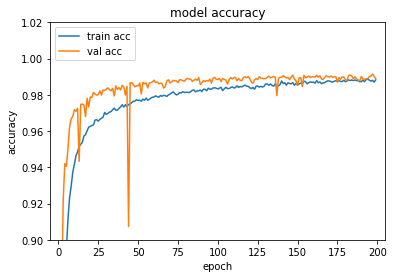

In [11]:
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('model accuracy')
plt.axis([-5, 205, 0.9, 1.02])
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train acc','val acc'], loc='upper left')
plt.show()

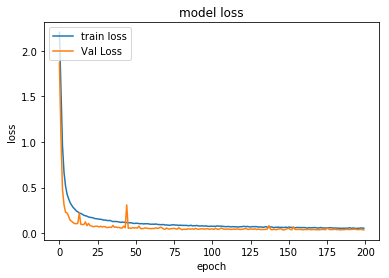

In [12]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train loss','Val Loss'], loc='upper left')
plt.show()

In [13]:
# Test the model
score = model.evaluate(x_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Test loss: 0.0366980079857
Test accuracy: 0.9889


In [14]:
print(history.history)

{'val_loss': [1.8684523170471192, 1.0551044807434082, 0.48277604029178617, 0.31141906464099883, 0.23040992366075516, 0.22226351505536587, 0.18644406933784485, 0.14222793009553569, 0.13075476956181228, 0.11618885068874805, 0.10599015997778624, 0.10445210258823499, 0.10734684932283708, 0.22041204575076701, 0.098236344521368299, 0.094950904988436918, 0.095743950803366173, 0.12385526985536635, 0.082440785448653339, 0.10711971898186602, 0.084337162725711817, 0.078419401365485641, 0.071812848084570627, 0.074721057625453613, 0.077307952666537588, 0.075913764989383709, 0.068062133470887423, 0.076708306128323966, 0.067555076613347767, 0.072630719898300777, 0.071278656113978101, 0.061203124581783779, 0.064733274134894783, 0.067262479511415035, 0.063695142921129905, 0.084940995767662578, 0.064848731078333555, 0.069771834383057646, 0.061538479733786428, 0.064485298398253413, 0.057651637428005054, 0.056602088148836945, 0.077831609588803891, 0.059505701050736388, 0.31011390140056611, 0.0544632792279

In [15]:

data = pd.DataFrame(history.history)
nome = 'DoubleConvMNISTNormDropFinalConvGap_t2' + str(datetime.datetime.now())+'.json'
data = data.to_json()
with open(nome, "w+") as output_file:
    output_file.write(data)